In [ ]:
#imports necessary to run on google colab
#files needed to run -> COVIDLies.csv, COVIDLies.xlsx, lee_background.cor
# A lot of this code is imported from various gensim tutorials at https://radimrehurek.com/gensim/
%pip install --upgrade gensim
from gensim.models import FastText
from gensim.utils import tokenize
from gensim import utils
%pip install rake-nltk
%pip install emoji
from rake_nltk import Rake
import nltk
import numpy as np
import pandas as pd
from nltk.corpus import wordnet
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from bs4 import BeautifulSoup
import re
import itertools
import emoji
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE                   
import numpy as np                                  
import matplotlib.pyplot as plt
import random
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.graph_objs as go
%matplotlib notebook
%matplotlib inline
from sklearn.metrics import classification_report

Requirement already up-to-date: gensim in /usr/local/lib/python3.7/dist-packages (4.0.1)
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

In [ ]:
#####################################################################################
#
# DATA CLEANING FUNCTIONS taken from https://github.com/charlesmalafosse
#
#####################################################################################

def load_dict_smileys():
    
    return {
        ":‑)":"smiley",
        ":-]":"smiley",
        ":-3":"smiley",
        ":->":"smiley",
        "8-)":"smiley",
        ":-}":"smiley",
        ":)":"smiley",
        ":]":"smiley",
        ":3":"smiley",
        ":>":"smiley",
        "8)":"smiley",
        ":}":"smiley",
        ":o)":"smiley",
        ":c)":"smiley",
        ":^)":"smiley",
        "=]":"smiley",
        "=)":"smiley",
        ":-))":"smiley",
        ":‑D":"smiley",
        "8‑D":"smiley",
        "x‑D":"smiley",
        "X‑D":"smiley",
        ":D":"smiley",
        "8D":"smiley",
        "xD":"smiley",
        "XD":"smiley",
        ":‑(":"sad",
        ":‑c":"sad",
        ":‑<":"sad",
        ":‑[":"sad",
        ":(":"sad",
        ":c":"sad",
        ":<":"sad",
        ":[":"sad",
        ":-||":"sad",
        ">:[":"sad",
        ":{":"sad",
        ":@":"sad",
        ">:(":"sad",
        ":'‑(":"sad",
        ":'(":"sad",
        ":‑P":"playful",
        "X‑P":"playful",
        "x‑p":"playful",
        ":‑p":"playful",
        ":‑Þ":"playful",
        ":‑þ":"playful",
        ":‑b":"playful",
        ":P":"playful",
        "XP":"playful",
        "xp":"playful",
        ":p":"playful",
        ":Þ":"playful",
        ":þ":"playful",
        ":b":"playful",
        "<3":"love"
        }


def load_dict_contractions():
    
    return {
        "ain't":"is not",
        "amn't":"am not",
        "aren't":"are not",
        "can't":"cannot",
        "'cause":"because",
        "couldn't":"could not",
        "couldn't've":"could not have",
        "could've":"could have",
        "daren't":"dare not",
        "daresn't":"dare not",
        "dasn't":"dare not",
        "didn't":"did not",
        "doesn't":"does not",
        "don't":"do not",
        "e'er":"ever",
        "em":"them",
        "everyone's":"everyone is",
        "finna":"fixing to",
        "gimme":"give me",
        "gonna":"going to",
        "gon't":"go not",
        "gotta":"got to",
        "hadn't":"had not",
        "hasn't":"has not",
        "haven't":"have not",
        "he'd":"he would",
        "he'll":"he will",
        "he's":"he is",
        "he've":"he have",
        "how'd":"how would",
        "how'll":"how will",
        "how're":"how are",
        "how's":"how is",
        "I'd":"I would",
        "I'll":"I will",
        "I'm":"I am",
        "I'm'a":"I am about to",
        "I'm'o":"I am going to",
        "isn't":"is not",
        "it'd":"it would",
        "it'll":"it will",
        "it's":"it is",
        "I've":"I have",
        "kinda":"kind of",
        "let's":"let us",
        "mayn't":"may not",
        "may've":"may have",
        "mightn't":"might not",
        "might've":"might have",
        "mustn't":"must not",
        "mustn't've":"must not have",
        "must've":"must have",
        "needn't":"need not",
        "ne'er":"never",
        "o'":"of",
        "o'er":"over",
        "ol'":"old",
        "oughtn't":"ought not",
        "shalln't":"shall not",
        "shan't":"shall not",
        "she'd":"she would",
        "she'll":"she will",
        "she's":"she is",
        "shouldn't":"should not",
        "shouldn't've":"should not have",
        "should've":"should have",
        "somebody's":"somebody is",
        "someone's":"someone is",
        "something's":"something is",
        "that'd":"that would",
        "that'll":"that will",
        "that're":"that are",
        "that's":"that is",
        "there'd":"there would",
        "there'll":"there will",
        "there're":"there are",
        "there's":"there is",
        "these're":"these are",
        "they'd":"they would",
        "they'll":"they will",
        "they're":"they are",
        "they've":"they have",
        "this's":"this is",
        "those're":"those are",
        "'tis":"it is",
        "'twas":"it was",
        "wanna":"want to",
        "wasn't":"was not",
        "we'd":"we would",
        "we'd've":"we would have",
        "we'll":"we will",
        "we're":"we are",
        "weren't":"were not",
        "we've":"we have",
        "what'd":"what did",
        "what'll":"what will",
        "what're":"what are",
        "what's":"what is",
        "what've":"what have",
        "when's":"when is",
        "where'd":"where did",
        "where're":"where are",
        "where's":"where is",
        "where've":"where have",
        "which's":"which is",
        "who'd":"who would",
        "who'd've":"who would have",
        "who'll":"who will",
        "who're":"who are",
        "who's":"who is",
        "who've":"who have",
        "why'd":"why did",
        "why're":"why are",
        "why's":"why is",
        "won't":"will not",
        "wouldn't":"would not",
        "would've":"would have",
        "y'all":"you all",
        "you'd":"you would",
        "you'll":"you will",
        "you're":"you are",
        "you've":"you have",
        "Whatcha":"What are you",
        "luv":"love",
        "sux":"sucks"
        }


def strip_accents(text):
    if 'ø' in text or  'Ø' in text:
        #Do nothing when finding ø 
        return text   
    text = text.encode('ascii', 'ignore')
    text = text.decode("utf-8")
    return str(text)


def tweet_cleaning_for_sentiment_analysis(tweet):    
    
    #Escaping HTML characters
    tweet = BeautifulSoup(tweet).get_text()
    #Special case not handled previously.
    tweet = tweet.replace('\x92',"'")
    #Removal of hastags/account
    tweet = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)", " ", tweet).split())
    #Removal of address
    tweet = ' '.join(re.sub("(\w+:\/\/\S+)", " ", tweet).split())
    #Removal of Punctuation
    tweet = ' '.join(re.sub("[\.\,\!\?\:\;\-\=]", " ", tweet).split())
    #Lower case
    tweet = tweet.lower()
    #CONTRACTIONS source: https://en.wikipedia.org/wiki/Contraction_%28grammar%29
    CONTRACTIONS = load_dict_contractions()
    tweet = tweet.replace("’","")
    words = tweet.split()
    reformed = [CONTRACTIONS[word] if word in CONTRACTIONS else word for word in words]
    tweet = " ".join(reformed)
    # Standardizing words
    tweet = ''.join(''.join(s)[:2] for _, s in itertools.groupby(tweet))
    #Deal with smileys
    #source: https://en.wikipedia.org/wiki/List_of_emoticons
    SMILEY = load_dict_smileys()  
    words = tweet.split()
    reformed = [SMILEY[word] if word in SMILEY else word for word in words]
    tweet = " ".join(reformed)
    #Deal with emojis
    tweet = emoji.demojize(tweet)
    #Strip accents
    tweet= strip_accents(tweet)
    tweet = tweet.replace(":"," ")
    tweet = tweet.replace("(","")
    tweet = tweet.replace(")","")
    tweet = ' '.join(tweet.split())
    
    # DO NOT REMOVE STOP WORDS FOR SENTIMENT ANALYSIS - OR AT LEAST NOT NEGATIVE ONES

    return tweet

# Creating Training Data

In [ ]:
# DONT RUN IF USING EXTERNAL TRAINING DATA
def create_training_data(file_name1, file_name2):
  """ creates external training .txt and returns original file """
  data = pd.read_csv(file_name1)
  data = data.to_numpy()
  f = open("training_data.txt","w")
  for line in data[:,2]:
    processed_line = tweet_cleaning_for_sentiment_analysis(line)
    f.write(processed_line+"\n")
  for line in open(file_name2):
    processed_line = tweet_cleaning_for_sentiment_analysis(line)
    f.write(processed_line+"\n")
  f.close()
  return data

create_training_data("covid_lies.csv", "lee_corpus.txt") # Important: If creating training data, open training_data.txt and copy/paste another corpus with data already there!

array([[3, 'Coronavirus is genetically engineered.',
        'How the COVID-19 outbreak is changing global politics https://t.co/dc6lgl9l83',
        1233965490948591616, 'na'],
       [30, 'Blowing conch shells destroys coronavirus potency.',
        'Getting coronavirus and then coughing on people is accelerationist praxis',
        1233907923765559296, 'na'],
       [57,
        'Swans and dolphins swimming in Venice canals following COVID-19 lockdown.',
        'Disturbing letter about life in COVID-19 ward in China is abruptly retracted https://t.co/0acnXP9NxE https://t.co/esFjumux5v',
        1233911842910720000, 'na'],
       ...,
       [22, 'Cocaine cures coronavirus.',
        'How to prevent corona virus?🤔 Use cowdung cakes for Holika dahan, &amp; celebrate Vedic Holi inspired by Sant Shri Asharamji Bapu. You can easily make herbal colors at home using Palash, Turmeric etc 😇 #AdoptVedicHoliPreventCorona https://t.co/Rurn0Dz0aO',
        1233965616316334080, 'na'],
       [61

In [ ]:
# ONLY RUN IF TRAINING! DO NOT USE IF USING EXTERNAL MODEL
# Set file names for train and test data
corpus_file = 'training_data.txt'

model = FastText(vector_size=100)

# build the vocabulary
model.build_vocab(corpus_file=corpus_file)

# train the model
model.train(
    corpus_file=corpus_file, 
    epochs=25,
    vector_size = 50,
    total_examples=model.corpus_count, 
    total_words=model.corpus_total_words,
)

#print(model)
print("Finished Training.")

# save the model
# model.save("/content/gdrive/MyDrive/fasttext_model_epoch_25.model")
# print("Saved model.")

Finished Training.


In [ ]:
# help(model.train)

In [ ]:
# help(FastText)

# Getting Results

In [ ]:
# model = FastText.load("/content/gdrive/MyDrive/fasttext_model_epoch_25.model") # Comment out if using model from scratch
wv = model.wv
print(wv.most_similar("coronavirus"))
print(wv.most_similar("methanol"))

[('coronavirus"', 0.9724132418632507), ("coronavirus'", 0.9685710072517395), ('betacoronavirus', 0.9473258852958679), ('"coronavirus"', 0.9320625066757202), ('coronaviruses', 0.8560380339622498), ('coronavrus', 0.8474070429801941), ('coroner', 0.6017720699310303), ('virus', 0.5996500253677368), ('corona', 0.5977489948272705), ('rhinovirus', 0.5942414999008179)]
[('ethanol', 0.9628907442092896), ('75%', 0.697844922542572), ('tylenol', 0.6886188983917236), ('peracetic', 0.6867058277130127), ('alcohol', 0.6747210025787354), ('bugs', 0.6700365543365479), ('alkaline/organic', 0.6566609144210815), ('20kgs', 0.6559475660324097), ('liquids', 0.6424443125724792), ('bleach/chlorine', 0.6378674507141113)]


In [ ]:
print(wv.n_similarity(['cat','ate','mouse'],['mouse','eaten by','cat']))

0.79821587


## Word Mover's Distance

In [ ]:
# JUST FOR TESTING NOT USED
from gensim.parsing.preprocessing import STOPWORDS
sentence_tweet = "@USERNAME @USERNAME nah. A biological warfare agent would kill 99% of its victims, not 2% like the corona virus. This is a naturally occurring virus.".lower().split()
sentence_misconcept = "Viruses are wastes from cells that are poisoned by electromagnetic fields.".lower().split()
distance = wv.wmdistance(sentence_tweet, sentence_misconcept)
print(f"Word Movers Distance is {distance} (lower means closer)")


Word Movers Distance is 1.1711937489376203 (lower means closer)


In [ ]:
# JUST FOR TESTING NOT USED
sentence_tweet = "We're very far from a vaccine".lower().split()
sentence_misconcept = "We're very close to a vaccine.".lower().split()
distance = wv.wmdistance(sentence_tweet, sentence_misconcept)
print(f"Word Movers Distance is {distance} (lower means closer)")

Word Movers Distance is 0.44962434656687905 (lower means closer)


## Rapid Automatic Keyword Extraction

In [ ]:
r1tweet = "@USERNAME I understand Israel will have a vaccine for coronavirus in a few weeks.".lower()
r2tweet = "We're very close to a vaccine.".lower()

r1 = Rake()
r1.extract_keywords_from_text(r1tweet)
print(r1.get_ranked_phrases())
# Problem: taking "weeks" and not "few weeks" -> affecting outcome
  # sent1 = r1.get_ranked_phrases()
  # sent1[1]="few weeks"   

r2 = Rake()
r2.extract_keywords_from_text(r2tweet)
print(r2.get_ranked_phrases())

print(wv.n_similarity(r1.get_ranked_phrases(),r2.get_ranked_phrases()))

['understand israel', 'weeks', 'vaccine', 'username', 'coronavirus']
['vaccine', 'close']
0.68409455


In [ ]:
# Goal: 

In [ ]:
def get_antonyms(word): #Find antonyms for a word using WordNet
  antonyms = []
  for syn in wordnet.synsets(word):
    for l in syn.lemmas():
      if l.antonyms():
        antonyms.append(l.antonyms()[0].name())
  return antonyms

def adjust_phrase(rp:"ranked phrase",op:"original phrase"): #Attach adj and adv to all key phrases. Reverse meaning of sentence if "not" present. May result in wrong result.
  op_tokens = op.split()
  tags = nltk.pos_tag(op_tokens)
  for w,t in tags:
    if (t[:2] == 'JJ' or t[:2] == 'RB'):
      if (op_tokens.index(w)+1 >= len(op_tokens)):
        continue
      next_word = op_tokens[op_tokens.index(w) + 1]
      next_word = re.sub(r'[^\w\s]', '', next_word)
      if (next_word in rp):
        conjuncted_phrase = w+" "+next_word
        rp[rp.index(next_word)] = conjuncted_phrase
  word = 0
  while word < len(rp):
    if "not" in rp[word].split():
      to_replace = rp[word].split()[1]
      # print("finding antonym for: ",to_replace)
      replace_with = get_antonyms(to_replace)
      # print("\tantonym retrieved:",replace_with)
      rp[word] = replace_with[0] if replace_with else ""
    word += 1
  return rp

def remove_low_similarity(l1,l2): # Remove noise from data by keeping phrases that are similar to each other.
  result1 = set()
  result2 = set()
  for i in l1:
    for j in l2:
      try:
        if wv.n_similarity(i,j) > .50:
          result1.add(i)
          result2.add(j)
      except:
        continue
  return [list(result1),list(result2)]

In [ ]:
#USED FOR DEBUGGING IGNORE
# print(get_antonyms("comedy"))
# print(wv.n_similarity(["comedy"],["tragedy"]))
# r1tweet = "I did not think the show was funny .".lower()
# r2tweet = "We're very close to a vaccine.".lower()

# r1 = Rake()
# r1.extract_keywords_from_text(r1tweet)
# print(r1.get_ranked_phrases())
# # Problem: taking "weeks" and not "few weeks" -> affecting outcome
#   # sent1 = r1.get_ranked_phrases()
#   # sent1[1]="few weeks"   

# r2 = Rake()
# r2.extract_keywords_from_text(r2tweet)
# # print(r2.get_ranked_phrases())
# print(adjust_phrase(r1.get_ranked_phrases(), r1tweet))

# print(calc_similarity_w_rake("it is not hot today.","Today is so cold"))

In [ ]:
def calc_similarity_w_rake(p1,p2,info=False): #Call functions above and assign cosine similarity score to each misinformation tweet pair.
  #preprocess
  if type(p1) == float or type(p2) == float:
    return 0.0
  pp1, pp2 = tweet_cleaning_for_sentiment_analysis(p1), tweet_cleaning_for_sentiment_analysis(p2)

  # create list of ranked phrases from p1
  rp1 = Rake()
  rp1.extract_keywords_from_text(pp1)

  # create list of ranked phrases from p2
  rp2 = Rake()
  rp2.extract_keywords_from_text(pp2)

  if (info == True): # For debugging
    print("previous:\n",rp1.get_ranked_phrases(),"\n",rp2.get_ranked_phrases())

  # adding adj and adv to phrases & removing low similarities
  result1 = adjust_phrase(rp1.get_ranked_phrases(),p1)
  result2 = adjust_phrase(rp2.get_ranked_phrases(),p2)

  # result1, result2 = remove_low_similarity(result1,result2)

  if (info == True): # For debugging
    print("new:\n",result1,"\n",result2)

  try:
    result = wv.n_similarity(result1,result2)
  except:
    result = 0.0

  return result

print(calc_similarity_w_rake("Dean Koontz predicted the pandemic in his 1981 novel The Eyes of Darkness.", 
                             "@USERNAME By making it happen.. also Dean Koontz wrote the book in 1993 The Eyes of Darkness he put Wuhan400 right in it.   ",
                             info=True))

previous:
 ['dean koontz predicted', '1981 novel', 'pandemic', 'eyes', 'darkness'] 
 ['happen also dean koontz wrote', 'put wuhan400 right', 'making', 'eyes', 'darkness', 'book', '1993']
new:
 ['dean koontz predicted', '1981 novel', 'pandemic', 'eyes', 'darkness'] 
 ['happen also dean koontz wrote', 'put wuhan400 right', 'making', 'eyes', 'darkness', 'book', '1993']
0.63985264


# Testing (Precision/Recall)

In [ ]:
def create_test_data(fn):
  data = pd.read_excel(fn, usecols = [1,2,4])
  test_data = data.to_numpy()
  for i in range(len(test_data)):
    if test_data[i,2] == "pos":
      test_data[i,2] = 1
    else:
      test_data[i,2] = 0
  print(test_data.shape)
  return test_data

test_data = create_test_data("covid_lies.xlsx") #test data comprises of misinformation,tweet,label (1 for agree and 0 for na/disagree).

(6591, 3)


In [ ]:
#test_data[0:20]

In [ ]:
def predict_pos(td, threshold): #predict labels for each misinformation,tweet pair.
  result = []
  for i in td:
    similarity = calc_similarity_w_rake(i[0],i[1])
    if (similarity >= threshold):
      result.append(1)
    else:
      result.append(0)
  return np.array(result,dtype=int)

In [ ]:
y_pred = predict_pos(test_data[:,0:2],0.7)
y_true = np.array(test_data[:,2], dtype=int)

In [ ]:
# print(y_pred)
print("Total ones predicted: ",sum(y_pred))
# print(y_true)

Total ones predicted:  907


In [ ]:
scores = classification_report(y_true,y_pred)
print(scores)

              precision    recall  f1-score   support

           0       0.96      0.87      0.91      6303
           1       0.08      0.24      0.12       288

    accuracy                           0.84      6591
   macro avg       0.52      0.55      0.51      6591
weighted avg       0.92      0.84      0.88      6591



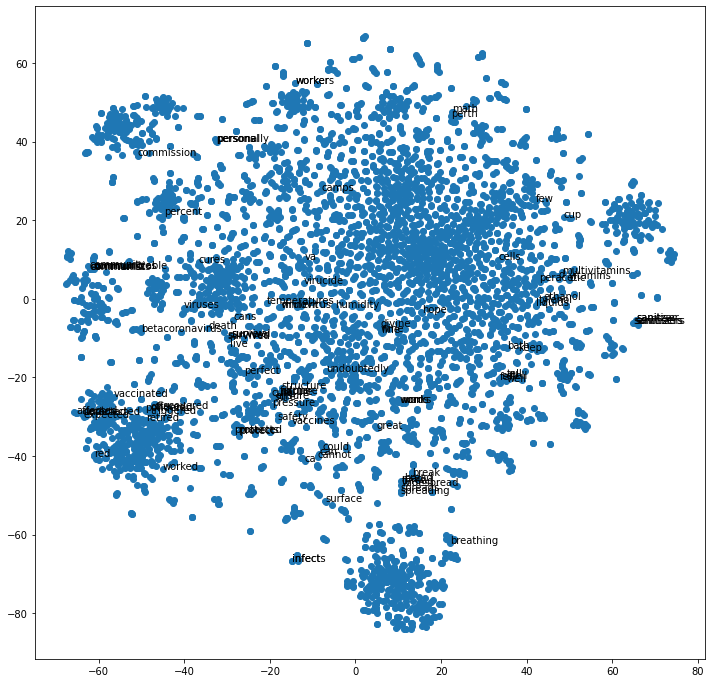

In [ ]:
#To plot learned word representations.
marked_words = {'multivitamins', 'worn', 'widespread', 'workers', 'protects', 'can', 'infects', 'tylenol', 'worked', 'great', 'could', 'cures', 'break', 'red', 'safety', 'nature', 'survey', 'percent', 'protected', 'temperatures', 'persons', 'liquids', 'vaccines', 'breathing', 'commission', 'perth', 'sanitzer', 'structure', 'hope', 'community', 'cannot', 'read', 'camps', 'communities', 'divine', 'survives', 'few', 'undoubtedly', 'viruses', 'spreading', 'ethanol', 'cells', 'spreads', 'death', 'bath', 'pondered', 'humidity', 'survival', 'keep', 'hell', 'virucide', 'd', 'cans', 'virulent', 'wine', 'detected', 'personal', 'communicable', 'c', 'perfect', 'triggered', 'offered', 'va', 'communists', 'personally', 'live', 'well', 'cure', 'peracetic', 'infect', 'discovered', 'affected', 'expected', 'pressure', 'sanitizers', 'math', 'surface', 'works', 'sell', 'tell', 'ca', 'vitamins', 'sanitisers', 'thread', 'communist', 'protect', 'rhinovirus', 'retired', 'sanitiser', 'santitizers', 'vaccinated', 'words', 'cup', 'fine', 'undetected', 'ensure', 'betacoronavirus', 'survived', 'sure', 'fell', 'worker', 'bread', 'picture', 'future'}
def reduce_dimensions(model):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(model.wv.vectors)
    labels = np.asarray(model.wv.index_to_key)  # fixed-width numpy strings

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, random_state=0)
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels


x_vals, y_vals, labels = reduce_dimensions(model)

def plot_with_plotly(x_vals, y_vals, labels, plot_in_notebook=True):

    trace = go.Scatter(x=x_vals, y=y_vals, mode='text', text=labels)
    data = [trace]

    if plot_in_notebook:
        init_notebook_mode(connected=True)
        iplot(data, filename='word-embedding-plot')
    else:
        plot(data, filename='word-embedding-plot.html')


def plot_with_matplotlib(x_vals, y_vals, labels, ):


    random.seed(0)

    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    #
    # Label randomly subsampled 25 data points
    #
    indices = []
    for i in range(len(labels)):
      if labels[i] in marked_words:
        indices.append(i)
    # indices = list(range(len(labels)))
    # selected_indices = random.sample(indices, 200)
    for i in indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

try:
    get_ipython()
except Exception:
    plot_function = plot_with_matplotlib
else:
    plot_function = plot_with_matplotlib
plot_function(x_vals, y_vals, labels)